# Increasing Trend

In [1]:
!pip install khayyam
!pip install unidecode

     |████████████████████████████████| 46 kB 3.0 MB/s 
  Created wheel for khayyam: filename=Khayyam-3.0.17-cp37-cp37m-linux_x86_64.whl size=74600 sha256=647fefbcc4cc530cb3a8e7e065c455b0e75215a298af110686929cfc3fd36dc6
  Stored in directory: /root/.cache/pip/wheels/5c/27/04/a40f5c44518210fbd57f8a2045ee50f835bcb75fe884daca06
Successfully built khayyam
     |████████████████████████████████| 235 kB 6.3 MB/s 


In [2]:
pip install 'openpyxl==3.0.0'

     |████████████████████████████████| 172 kB 30.9 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=da6fbd7e5454edd62b29ea2a92cd4f492fad1a631f2fc39fa1a05ad93f0b3e33
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from numpy import array

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
import tensorflow as tf

from itertools import cycle
from khayyam import *
from datetime import date, datetime
import datetime as dt
from unidecode import unidecode
# ! pip install plotly

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
khasapa = pd.read_csv('/content/drive/MyDrive/SN/Final/final__/khasapa.csv')
khasapa

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI
0,2370.0,2320.0,2500.0,2450.0,1400-1-7,خساپا,1441935998,2021-03-27,NaN,2450.000000,NaN
1,2500.0,2420.0,2560.0,2480.0,1400-1-8,خساپا,796064822,2021-03-28,NaN,2468.000000,NaN
2,2470.0,2440.0,2480.0,2450.0,1400-1-10,خساپا,357589439,2021-03-30,NaN,2459.473684,NaN
3,2410.0,2410.0,2430.0,2410.0,1400-1-11,خساپا,46336832,2021-03-31,NaN,2438.923077,NaN
4,2370.0,2370.0,2370.0,2400.0,1400-1-14,خساپا,12418780,2021-04-03,2438.0,2423.981043,NaN
...,...,...,...,...,...,...,...,...,...,...,...
170,1650.0,1611.0,1690.0,1653.0,1400-10-27,خساپا,221654898,2022-01-17,1664.8,1654.056124,49.512716
171,1620.0,1571.0,1639.0,1577.0,1400-10-28,خساپا,230409293,2022-01-18,1636.2,1628.370749,42.379939
172,1574.0,1545.0,1617.0,1580.0,1400-10-29,خساپا,147009186,2022-01-19,1612.2,1612.247166,42.730655
173,1600.0,1511.0,1613.0,1552.0,1400-11-2,خساپا,170257245,2022-01-22,1597.2,1592.164777,40.267141


In [6]:
khasapa_social = pd.read_excel('/content/drive/MyDrive/SN/Final/social_data/خساپا.xlsx')
khasapa_social

,date and time,view
0,۱۲:۳۶:۵۳ ۱۴۰۰/۰۱/۰۳,3225
1,۰۸:۲۳:۱۳ ۱۴۰۰/۰۱/۰۴,310
2,۱۸:۳۸:۲۷ ۱۴۰۰/۰۱/۰۴,132
3,۲۰:۰۵:۱۳ ۱۴۰۰/۰۱/۰۶,883
4,۲۲:۰۵:۰۶ ۱۴۰۰/۰۱/۰۶,3449
...,...,...
8566,۱۶:۲۷:۲۱ ۱۴۰۰/۱۱/۰۳,141
8567,۱۶:۳۵:۵۰ ۱۴۰۰/۱۱/۰۳,72
8568,۱۶:۳۶:۰۲ ۱۴۰۰/۱۱/۰۳,67
8569,۱۷:۳۱:۰۴ ۱۴۰۰/۱۱/۰۳,1576


In [7]:
khasapa_social.columns = ['date and time', 'view']
khasapa_social['presian_date'] = khasapa_social['date and time'].apply(lambda x: x.split(" ")[1])
khasapa_social['gregorian_date'] = khasapa_social['presian_date'].apply(lambda x: JalaliDate(int(unidecode(x.split("/")[0])), int(unidecode(x.split("/")[1])), int(unidecode(x.split("/")[2]))).todate())
khasapa_social = khasapa_social[['gregorian_date', 'view']]
khasapa_social = khasapa_social.groupby(by='gregorian_date').mean()
khasapa_social['gregorian_date'] = khasapa_social.index
khasapa_social['gregorian_date'] = khasapa_social['gregorian_date'].astype(str)
khasapa_social['index'] = [i for i in range(len(khasapa_social))]
khasapa_social.set_index('index', inplace=True)
khasapa_social

,view,gregorian_date
index,,
0,3225.000000,2021-03-23
1,221.000000,2021-03-24
2,2166.000000,2021-03-26
3,5645.853933,2021-03-27
4,4585.809524,2021-03-28
...,...,...
291,1399.666667,2022-01-19
292,6456.181818,2022-01-20
293,2750.952381,2022-01-21


# Merging

In [8]:
khasapa_df=pd.merge(khasapa,khasapa_social, on='gregorian_date', how='inner')
khasapa_df

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI,view
0,2370.0,2320.0,2500.0,2450.0,1400-1-7,خساپا,1441935998,2021-03-27,NaN,2450.000000,NaN,5645.853933
1,2500.0,2420.0,2560.0,2480.0,1400-1-8,خساپا,796064822,2021-03-28,NaN,2468.000000,NaN,4585.809524
2,2470.0,2440.0,2480.0,2450.0,1400-1-10,خساپا,357589439,2021-03-30,NaN,2459.473684,NaN,5193.725000
3,2410.0,2410.0,2430.0,2410.0,1400-1-11,خساپا,46336832,2021-03-31,NaN,2438.923077,NaN,5020.702128
4,2370.0,2370.0,2370.0,2400.0,1400-1-14,خساپا,12418780,2021-04-03,2438.0,2423.981043,NaN,4725.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
170,1650.0,1611.0,1690.0,1653.0,1400-10-27,خساپا,221654898,2022-01-17,1664.8,1654.056124,49.512716,1278.409091
171,1620.0,1571.0,1639.0,1577.0,1400-10-28,خساپا,230409293,2022-01-18,1636.2,1628.370749,42.379939,527.384615
172,1574.0,1545.0,1617.0,1580.0,1400-10-29,خساپا,147009186,2022-01-19,1612.2,1612.247166,42.730655,1399.666667
173,1600.0,1511.0,1613.0,1552.0,1400-11-2,خساپا,170257245,2022-01-22,1597.2,1592.164777,40.267141,1223.629630


In [ ]:
# k = khaperes_df['view'].ewm(span=10, adjust=False, min_periods=12).mean()
# # Get the 12-day EMA of the closing price
# d = khaperes_df['view'].ewm(span=22, adjust=False, min_periods=26).mean()
# # Subtract the 26-day EMA from the 12-Day EMA to get the MACD
# macd = k - d
# # Get the 9-Day EMA of the MACD for the Trigger line
# macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
# # Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
# macd_h = macd - macd_s
# # Add all of our new values for the MACD to the dataframe
# khaperes_df['macd'] = khaperes_df.index.map(macd)
# khaperes_df['macd_h'] = khaperes_df.index.map(macd_h)
# khaperes_df['macd_s'] = khaperes_df.index.map(macd_s)
# # View our data
# pd.set_option("display.max_columns", None)
# khaperes_df

In [9]:
def computeRSI (data, time_window):
    oneday = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    gain = 0 * oneday
    loss = 0 * oneday
    
    # up change is equal to the positive difference, otherwise equal to zero
    gain[oneday > 0] = oneday[ oneday>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    loss[oneday < 0] = oneday[ oneday < 0 ]
    
    # check pandas documentation for ewm
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    gain_avg   = gain.ewm(com=time_window-1 , min_periods=time_window).mean() #gainavg  is average gain over time window (period)
    loss_avg = loss.ewm(com=time_window-1 , min_periods=time_window).mean() #lossavg  is average loss over time window (period)
    
    rs = abs(gain_avg/loss_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [10]:
khasapa_df['view'] = khasapa_df['view'].to_frame()
khasapa_df['SMA5_view'] = khasapa_df['view'].rolling(5).mean()
khasapa_df['EWMA5_view'] = khasapa_df['view'].ewm(span=5).mean()
khasapa_df['RSI_view'] = computeRSI(khasapa_df['view'], 14)

In [11]:
khasapa_df

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI,view,SMA5_view,EWMA5_view,RSI_view
0,2370.0,2320.0,2500.0,2450.0,1400-1-7,خساپا,1441935998,2021-03-27,NaN,2450.000000,NaN,5645.853933,NaN,5645.853933,NaN
1,2500.0,2420.0,2560.0,2480.0,1400-1-8,خساپا,796064822,2021-03-28,NaN,2468.000000,NaN,4585.809524,NaN,5009.827287,NaN
2,2470.0,2440.0,2480.0,2450.0,1400-1-10,خساپا,357589439,2021-03-30,NaN,2459.473684,NaN,5193.725000,NaN,5096.936730,NaN
3,2410.0,2410.0,2430.0,2410.0,1400-1-11,خساپا,46336832,2021-03-31,NaN,2438.923077,NaN,5020.702128,NaN,5065.270049,NaN
4,2370.0,2370.0,2370.0,2400.0,1400-1-14,خساپا,12418780,2021-04-03,2438.0,2423.981043,NaN,4725.000000,5034.218117,4934.645054,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,1650.0,1611.0,1690.0,1653.0,1400-10-27,خساپا,221654898,2022-01-17,1664.8,1654.056124,49.512716,1278.409091,1613.849135,1567.133423,45.333622
171,1620.0,1571.0,1639.0,1577.0,1400-10-28,خساپا,230409293,2022-01-18,1636.2,1628.370749,42.379939,527.384615,1340.023201,1220.550487,41.290943
172,1574.0,1545.0,1617.0,1580.0,1400-10-29,خساپا,147009186,2022-01-19,1612.2,1612.247166,42.730655,1399.666667,1335.430953,1280.255880,47.182307
173,1600.0,1511.0,1613.0,1552.0,1400-11-2,خساپا,170257245,2022-01-22,1597.2,1592.164777,40.267141,1223.629630,1245.835778,1261.380463,46.175255


# RSI

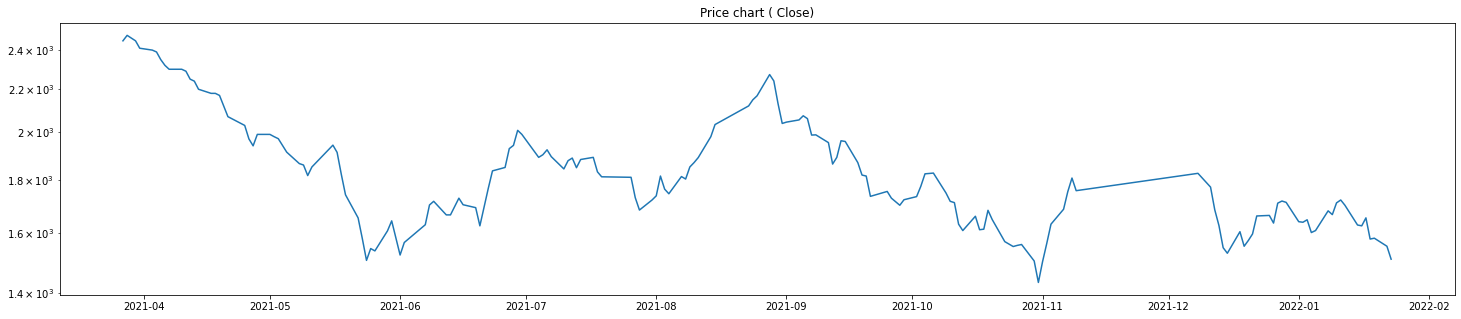

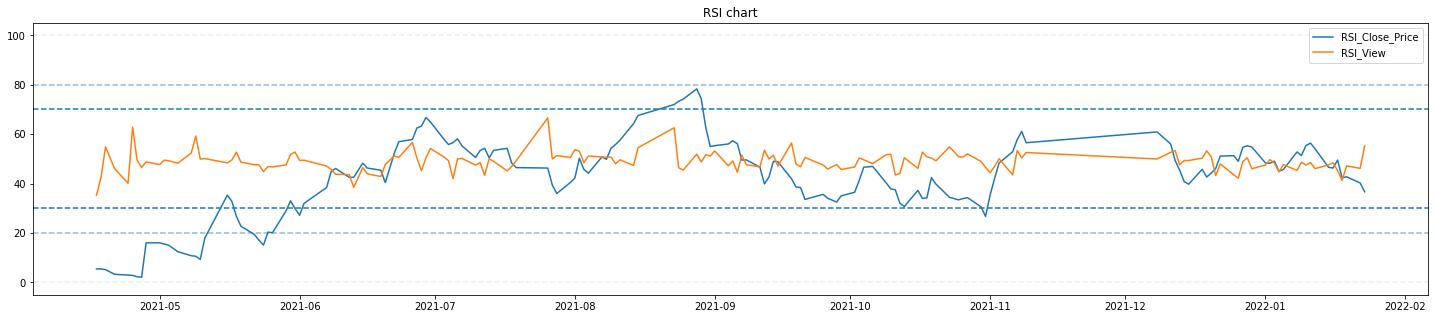

In [12]:
plt.figure(figsize=(25,5))
khasapa_df['date'] = pd.to_datetime(khasapa_df['gregorian_date'], format = '%Y-%m-%d')
plt.plot(khasapa_df['date'], khasapa_df['Close'],label='Close_Price')
plt.title('Price chart ( Close)')
plt.yscale("log")
plt.show()
plt.figure(figsize=(25,5))
plt.title('RSI chart')
plt.plot(khasapa_df['date'], khasapa_df['RSI'],label='RSI_Close_Price')
plt.plot(khasapa_df['date'], khasapa_df['RSI_view'],label='RSI_View')
plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')
plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.legend()
plt.show()

In [15]:
khasapa_df.columns = [x.lower() for x in khasapa_df.columns]
fig = make_subplots(rows=2, cols=1,subplot_titles=("Logarithmic Scale","Default Scale"))
# close price
fig.append_trace(
    go.Scatter(
        x=khasapa_df['gregorian_date'],
        y=(khasapa_df['close']),
        line=dict(color='#ff9900', width=1),
        name='Close',
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=khasapa_df['gregorian_date'],
        y=khasapa_df['rsi'],
        line=dict(color='#ff9900', width=2),
        name='RSI_Close',
        
        legendgroup='2',

    ), row=2, col=1
)

fig.append_trace(
    go.Scatter(
        x=khasapa_df['gregorian_date'],
        y=khasapa_df['rsi_view'],
        line=dict(color='black', width=2),
        name='RSI_View',

        legendgroup='2',
        
    ), row=2, col=1
)

layout = go.Layout(
    plot_bgcolor='#efefef',
    
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=18,
     width=1500,
     height=900
    # xaxis=dict(
    #     rangeslider=dict(
    #         visible=False
        )
    

# Update options and show plot
fig.update_yaxes( type="log", row=1, col=1)

fig.update_layout(layout)

fig.show()

# SMA

In [16]:
khasapa_df.columns = [x.lower() for x in khasapa_df.columns]
fig = make_subplots(rows=2, cols=1,subplot_titles=("Logarithmic Scale","Default Scale"))
# close price
fig.append_trace(
    go.Scatter(
        x=khasapa_df['gregorian_date'],
        y=(khasapa_df['close']),
        line=dict(color='#ff9900', width=1),
        name='Close',
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=khasapa_df['gregorian_date'],
        y=khasapa_df['sma5'],
        line=dict(color='#ff9900', width=2),
        name='SMA5_Close',
        legendgroup='2',

    ), row=2, col=1
)

fig.append_trace(
    go.Scatter(
        x=khasapa_df['gregorian_date'],
        y=khasapa_df['sma5_view'],
        line=dict(color='black', width=2),
        name='SMA5_view',

        legendgroup='2',
        
    ), row=2, col=1
)

layout = go.Layout(
    plot_bgcolor='#efefef',
    
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=18,
     width=1500,
     height=900
        )
    

# Update options and show plot
fig.update_yaxes( type="log", row=1, col=1)

fig.update_layout(layout)

fig.show()

In [17]:
khasapa_df

,open,low,high,close,date,symbol,volume,gregorian_date,sma5,ewma5,rsi,view,sma5_view,ewma5_view,rsi_view,date
0,2370.0,2320.0,2500.0,2450.0,1400-1-7,خساپا,1441935998,2021-03-27,NaN,2450.000000,NaN,5645.853933,NaN,5645.853933,NaN,2021-03-27
1,2500.0,2420.0,2560.0,2480.0,1400-1-8,خساپا,796064822,2021-03-28,NaN,2468.000000,NaN,4585.809524,NaN,5009.827287,NaN,2021-03-28
2,2470.0,2440.0,2480.0,2450.0,1400-1-10,خساپا,357589439,2021-03-30,NaN,2459.473684,NaN,5193.725000,NaN,5096.936730,NaN,2021-03-30
3,2410.0,2410.0,2430.0,2410.0,1400-1-11,خساپا,46336832,2021-03-31,NaN,2438.923077,NaN,5020.702128,NaN,5065.270049,NaN,2021-03-31
4,2370.0,2370.0,2370.0,2400.0,1400-1-14,خساپا,12418780,2021-04-03,2438.0,2423.981043,NaN,4725.000000,5034.218117,4934.645054,NaN,2021-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,1650.0,1611.0,1690.0,1653.0,1400-10-27,خساپا,221654898,2022-01-17,1664.8,1654.056124,49.512716,1278.409091,1613.849135,1567.133423,45.333622,2022-01-17
171,1620.0,1571.0,1639.0,1577.0,1400-10-28,خساپا,230409293,2022-01-18,1636.2,1628.370749,42.379939,527.384615,1340.023201,1220.550487,41.290943,2022-01-18
172,1574.0,1545.0,1617.0,1580.0,1400-10-29,خساپا,147009186,2022-01-19,1612.2,1612.247166,42.730655,1399.666667,1335.430953,1280.255880,47.182307,2022-01-19
173,1600.0,1511.0,1613.0,1552.0,1400-11-2,خساپا,170257245,2022-01-22,1597.2,1592.164777,40.267141,1223.629630,1245.835778,1261.380463,46.175255,2022-01-22


In [18]:
khasapa_df['sma5']=khasapa_df['sma5'].fillna(value=khasapa_df['sma5'].mean())
khasapa_df['rsi']=khasapa_df['rsi'].fillna(value=khasapa_df['rsi'].mean())
khasapa_df['sma5_view']=khasapa_df['sma5_view'].fillna(value=khasapa_df['sma5_view'].mean())
khasapa_df['rsi_view']=khasapa_df['rsi_view'].fillna(value=khasapa_df['rsi_view'].mean())

In [19]:
khasapa_df

,open,low,high,close,date,symbol,volume,gregorian_date,sma5,ewma5,rsi,view,sma5_view,ewma5_view,rsi_view,date
0,2370.0,2320.0,2500.0,2450.0,1400-1-7,خساپا,1441935998,2021-03-27,1822.812865,2450.000000,42.163174,5645.853933,3247.936147,5645.853933,48.937376,2021-03-27
1,2500.0,2420.0,2560.0,2480.0,1400-1-8,خساپا,796064822,2021-03-28,1822.812865,2468.000000,42.163174,4585.809524,3247.936147,5009.827287,48.937376,2021-03-28
2,2470.0,2440.0,2480.0,2450.0,1400-1-10,خساپا,357589439,2021-03-30,1822.812865,2459.473684,42.163174,5193.725000,3247.936147,5096.936730,48.937376,2021-03-30
3,2410.0,2410.0,2430.0,2410.0,1400-1-11,خساپا,46336832,2021-03-31,1822.812865,2438.923077,42.163174,5020.702128,3247.936147,5065.270049,48.937376,2021-03-31
4,2370.0,2370.0,2370.0,2400.0,1400-1-14,خساپا,12418780,2021-04-03,2438.000000,2423.981043,42.163174,4725.000000,5034.218117,4934.645054,48.937376,2021-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,1650.0,1611.0,1690.0,1653.0,1400-10-27,خساپا,221654898,2022-01-17,1664.800000,1654.056124,49.512716,1278.409091,1613.849135,1567.133423,45.333622,2022-01-17
171,1620.0,1571.0,1639.0,1577.0,1400-10-28,خساپا,230409293,2022-01-18,1636.200000,1628.370749,42.379939,527.384615,1340.023201,1220.550487,41.290943,2022-01-18
172,1574.0,1545.0,1617.0,1580.0,1400-10-29,خساپا,147009186,2022-01-19,1612.200000,1612.247166,42.730655,1399.666667,1335.430953,1280.255880,47.182307,2022-01-19
173,1600.0,1511.0,1613.0,1552.0,1400-11-2,خساپا,170257245,2022-01-22,1597.200000,1592.164777,40.267141,1223.629630,1245.835778,1261.380463,46.175255,2022-01-22


In [20]:
khasapa_df.isna().sum()

open              0
low               0
high              0
close             0
date              0
symbol            0
volume            0
gregorian_date    0
sma5              0
ewma5             0
rsi               0
view              0
sma5_view         0
ewma5_view        0
rsi_view          0
date              0
dtype: int64

## Part 1 : predicting stock close price

In [ ]:
khasapa_new = khasapa_df[['gregorian_date','close']]

print("Shape of dataframe:", khasapa_new.shape)

Shape of dataframe: (175, 2)


In [ ]:
del khasapa_new['gregorian_date']
scaler=MinMaxScaler(feature_range=(0,1))
khasapa_new=scaler.fit_transform(np.array(khasapa_new).reshape(-1,1))


In [24]:
def split(y, train_size=0.72):
    time_step = 15
    mid_train = int(len(y)*train_size)
    mid_test=len(y)-mid_train
    train_data=y[0:mid_train,:]
    test_data =y[mid_train:len(y),:1]
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)
    return train_data,test_data,X_train, y_train,X_test,y_test

# convert an array of values into a dataset matrix
def create_dataset(data, time_step=1):
    X = []
    Y=[]
    for i in range(len(data)-time_step-1):
        z = data[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        X.append(z)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [ ]:
train_data,test_data,X_train, y_train,X_test,y_test=split(khasapa_new, train_size=0.79)
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

train_data:  (138, 1)
test_data:  (37, 1)
X_train:  (122, 15)
y_train:  (122,)
X_test:  (21, 15)
y_test (21,)


In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Creating the model

In [ ]:
tf.keras.backend.clear_session()
time_step = 15
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


# Fitting the model

In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_close_price=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
4/4 [==============================] - 10s 707ms/step - loss: 0.1425 - val_loss: 0.0091
Epoch 2/50
4/4 [==============================] - 0s 42ms/step - loss: 0.0436 - val_loss: 0.0111
Epoch 3/50
4/4 [==============================] - 0s 38ms/step - loss: 0.0329 - val_loss: 0.0285
Epoch 4/50
4/4 [==============================] - 0s 39ms/step - loss: 0.0277 - val_loss: 0.0089
Epoch 5/50
4/4 [==============================] - 0s 38ms/step - loss: 0.0214 - val_loss: 0.0032
Epoch 6/50
4/4 [==============================] - 0s 41ms/step - loss: 0.0258 - val_loss: 0.0034
Epoch 7/50
4/4 [==============================] - 0s 41ms/step - loss: 0.0222 - val_loss: 0.0079
Epoch 8/50
4/4 [==============================] - 0s 41ms/step - loss: 0.0197 - val_loss: 0.0147
Epoch 9/50
4/4 [==============================] - 0s 45ms/step - loss: 0.0213 - val_loss: 0.0141
Epoch 10/50
4/4 [==============================] - 0s 47ms/step - loss: 0.0203 - val_loss: 0.0084
Epoch 11/50
4/4 [==========

# Loss

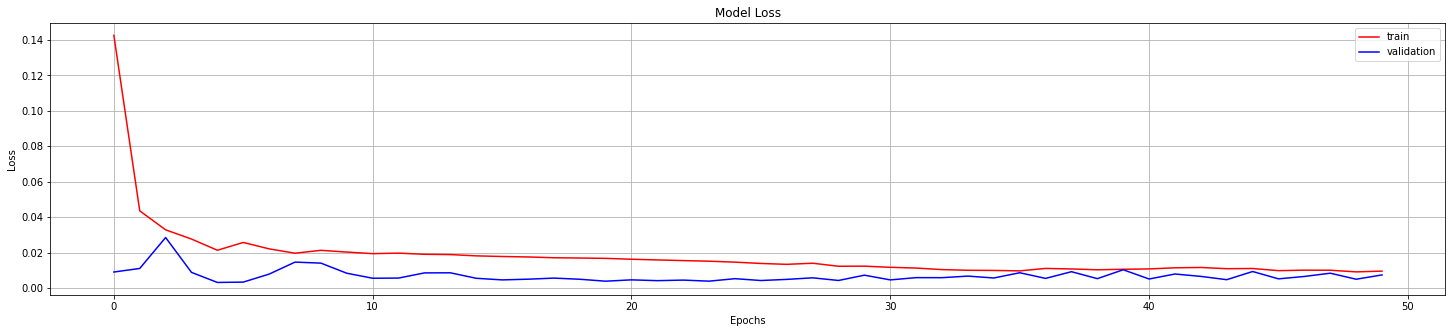

In [ ]:
# Plot the Loss Curves

plt.figure(figsize=(25,5))
plt.plot(history_close_price.history['loss'],'r')
plt.plot(history_close_price.history['val_loss'],'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


In [ ]:

predict=model.predict(X_test)
predictt = scaler.inverse_transform(predict)
ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
print("Test data R2 score:", r2_score(ytest, predictt))

Test data R2 score: -2.4725096009441607


In [ ]:
k=test_data[len(test_data)-time_step:].reshape(1,-1)
temp=list(k)
temp=temp[0].tolist()
next_day_predict=[]
steps=time_step
for i in range(5):
    if(len(temp)>time_step):
        k=np.array(temp[1:])
        k = k.reshape(1,-1)
        k = k.reshape((1, steps, 1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        temp=temp[1:]
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
    else:
        k = k.reshape((1, steps,1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
               
last_days=np.arange(1,time_step+1)
pre_days=np.arange(time_step+1,time_step+10+1)

print(next_day_predict)
print("--------------------------------------------")
print('last_days are',last_days)
print("--------------------------------------------")
print('pre_days are',pre_days)

[[0.23275868594646454], [0.21884852647781372], [0.2111150175333023], [0.21159148216247559], [0.22103427350521088]]
--------------------------------------------
last_days are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
--------------------------------------------
pre_days are [16 17 18 19 20 21 22 23 24 25]


# prediction

In [ ]:
value = np.empty((len(last_days)+11,1))
value[:] = np.nan
value = value.reshape(1,-1).tolist()[0]

real_last_days_value = value
predicted_days_value = value

real_last_days_value[1:time_step+1] = scaler.inverse_transform(khasapa_new[len(khasapa_new)-time_step:]).reshape(1,-1).tolist()[0]
predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(next_day_predict).reshape(-1,1)).reshape(1,-1).tolist()[0]

plot = pd.DataFrame({
    'real_last_days_value':real_last_days_value,
    'predicted_days_value':predicted_days_value
})

j=cycle(['Last 15 days of close price ','Predicted next 5 days of close price '])
fig = px.line(plot,x=plot.index, y=[plot['real_last_days_value'],
                                                      plot['predicted_days_value']],
              labels={'value': 'Stock of close price','index': 'Timestamp'},color_discrete_map={
                 "real_last_days_value": "red",
                 "predicted_days_value": "red"})

fig.add_vline(x=15, line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=16, line_width=3, line_dash="dash", line_color="green", fillcolor="blue")
fig.add_hrect(y0=16, y1=20, line_width=0, opacity=0.2)


fig.update_layout(title_text='Compare last 15 days vs next 5 days of khasapa stock',
                  plot_bgcolor='white', font_size=13, font_color='black',legend_title_text='Indicators')

fig.for_each_trace(lambda t:  t.update(name = next(j)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

##### Real close_price--> 3 bahman in tsetmc site =1508 , 4 bahmn = 1520   (increase  > 0.5 we assaign +1 (based on pdf))
##### Real close_price  --> 3 bahman (timestamp=15) in our data =1508 ,  our model prediction for 4 bahmn(timestamp=16) = 1678 (increase > 0.5 we assaign +1 (based on pdf))
##------------------------------------------------------------------------------
### So our accuracy is 100%

## Part 2 prediction with adding social indicators


In [21]:
khasapa_new = khasapa_df[['gregorian_date','rsi','rsi_view','sma5','sma5_view']]


print("Shape of dataframe:", khasapa_new.shape)

Shape of dataframe: (175, 5)


In [22]:
del khasapa_new['gregorian_date']
scaler=MinMaxScaler(feature_range=(0,1))
khasapa_new=scaler.fit_transform(np.array(khasapa_new).reshape(-1,1))


In [25]:
train_data,test_data,X_train, y_train,X_test,y_test=split(khasapa_new, train_size=0.78)
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

train_data:  (546, 1)
test_data:  (154, 1)
X_train:  (530, 15)
y_train:  (530,)
X_test:  (138, 15)
y_test (138,)


In [26]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [27]:
tf.keras.backend.clear_session()
time_step = 15
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


In [28]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_indicator=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=32,verbose=1)


Epoch 1/50
17/17 [==============================] - 10s 139ms/step - loss: 0.0944 - val_loss: 0.0373
Epoch 2/50
17/17 [==============================] - 1s 33ms/step - loss: 0.0813 - val_loss: 0.0388
Epoch 3/50
17/17 [==============================] - 1s 33ms/step - loss: 0.0808 - val_loss: 0.0381
Epoch 4/50
17/17 [==============================] - 1s 33ms/step - loss: 0.0806 - val_loss: 0.0376
Epoch 5/50
17/17 [==============================] - 1s 33ms/step - loss: 0.0801 - val_loss: 0.0407
Epoch 6/50
17/17 [==============================] - 1s 32ms/step - loss: 0.0791 - val_loss: 0.0357
Epoch 7/50
17/17 [==============================] - 1s 33ms/step - loss: 0.0807 - val_loss: 0.0400
Epoch 8/50
17/17 [==============================] - 1s 34ms/step - loss: 0.0782 - val_loss: 0.0395
Epoch 9/50
17/17 [==============================] - 1s 33ms/step - loss: 0.0721 - val_loss: 0.0835
Epoch 10/50
17/17 [==============================] - 1s 33ms/step - loss: 0.0738 - val_loss: 0.0329
Epoch 1

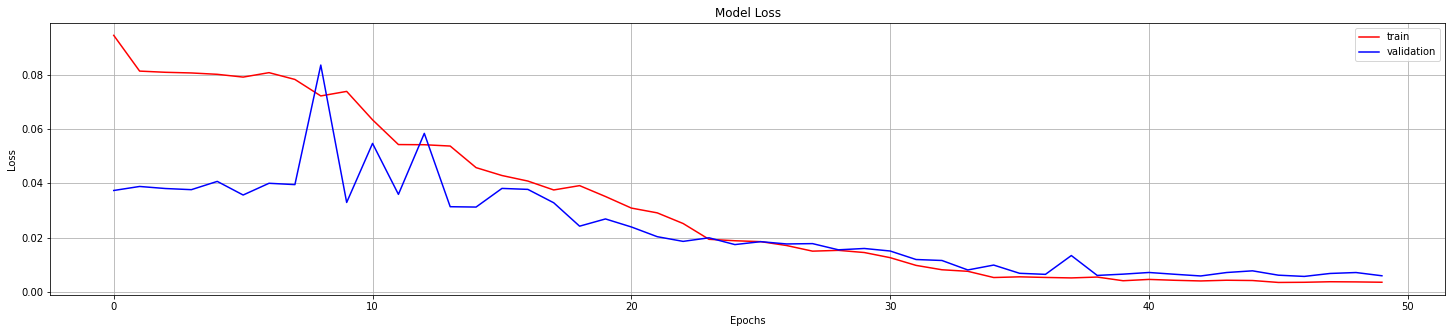

In [29]:
# Plot the Loss Curves

plt.figure(figsize=(25,5))
plt.plot(history_indicator.history['loss'],'r')
plt.plot(history_indicator.history['val_loss'],'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


In [30]:

predict=model.predict(X_test)
predictt = scaler.inverse_transform(predict)
ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [31]:
print("Test data R2 score:", r2_score(ytest, predictt))

Test data R2 score: 0.8333018307400777


In [32]:
k=test_data[len(test_data)-time_step:].reshape(1,-1)
temp=list(k)
temp=temp[0].tolist()
next_day_predict=[]
steps=time_step
for i in range(5):
    if(len(temp)>time_step):
        k=np.array(temp[1:])
        k = k.reshape(1,-1)
        k = k.reshape((1, steps, 1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        temp=temp[1:]
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
    else:
        k = k.reshape((1, steps,1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
               
last_days=np.arange(1,time_step+1)
pre_days=np.arange(time_step+1,time_step+10+1)

print(next_day_predict)
print("--------------------------------------------")
print('last_days are',last_days)
print("--------------------------------------------")
print('pre_days are',pre_days)


[[0.08349376916885376], [0.06122484430670738], [0.10699456930160522], [0.3786952793598175], [0.10483267903327942]]
--------------------------------------------
last_days are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
--------------------------------------------
pre_days are [16 17 18 19 20 21 22 23 24 25]


In [33]:
value = np.empty((len(last_days)+11,1))
value[:] = np.nan
value = value.reshape(1,-1).tolist()[0]

real_last_days_value = value
predicted_days_value = value

real_last_days_value[1:time_step+1] = scaler.inverse_transform(khasapa_new[len(khasapa_new)-time_step:]).reshape(1,-1).tolist()[0]
predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(next_day_predict).reshape(-1,1)).reshape(1,-1).tolist()[0]

plot = pd.DataFrame({
    'real_last_days_value':real_last_days_value,
    'predicted_days_value':predicted_days_value
})

j=cycle(['Last 15 days with indicator of close price and view price','Predicted next 5 days with indicator of close price and view price'])
fig = px.line(plot,x=plot.index, y=[plot['real_last_days_value'],
                                                      plot['predicted_days_value']],
              labels={'value': 'Stock of indicator price','index': 'Timestamp'},color_discrete_map={
                 "real_last_days_value": "red",
                 "predicted_days_value": "red"})

fig.add_vline(x=15, line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=16, line_width=3, line_dash="dash", line_color="green", fillcolor="blue")
fig.add_hrect(y0=16, y1=20, line_width=0, fillcolor="red", opacity=0.2)


fig.update_layout(title_text='Compare last 15 days vs next 5 days of khasapa stock',
                  plot_bgcolor='white', font_size=13, font_color='black',legend_title_text='Indicators')

fig.for_each_trace(lambda t:  t.update(name = next(j)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

sood

##### Real close_price--> 3 bahman in tsetmc site =1508 , 4 bahmn = 1520   (increase  > 0.5 we assaign +1 (based on pdf))
##### Real close_price with indicators  --> 3 bahman (timestamp=15) in our data =1439 ,  our model prediction for 4 bahmn(timestamp=16) = 450 (decrease < -0.5 we assaign -1 (based on pdf))
##------------------------------------------------------------------------------
### So social indicators cant help us to predict the trend correctly